<a href="https://colab.research.google.com/github/Smehta1234/Multithreading/blob/main/MultiThreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running with 1 threads...
Time taken with 1 threads: 0.41 minutes
Running with 2 threads...
Time taken with 2 threads: 0.16 minutes
Running with 3 threads...
Time taken with 3 threads: 0.13 minutes
Running with 4 threads...
Time taken with 4 threads: 0.16 minutes
Running with 5 threads...
Time taken with 5 threads: 0.16 minutes
Running with 6 threads...
Time taken with 6 threads: 0.16 minutes
Running with 7 threads...
Time taken with 7 threads: 0.16 minutes
Running with 8 threads...
Time taken with 8 threads: 0.13 minutes

Results Table:
Threads	Time Taken (min)
1	0.41
2	0.16
3	0.13
4	0.16
5	0.16
6	0.16
7	0.16
8	0.13


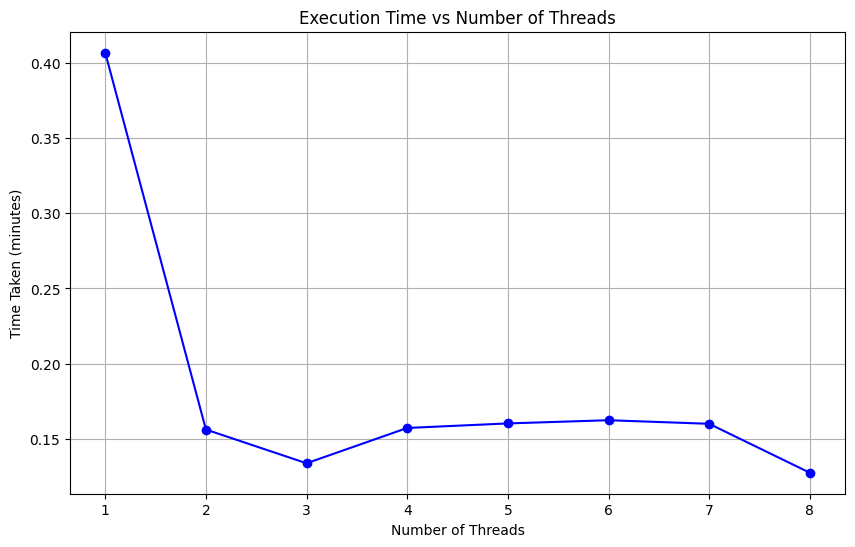


CPU Usage Monitoring:
Threads=1: CPU Usage per core (Start): [100.0, 100.0]
Threads=1: CPU Usage per core (End): [90.8, 83.8]
Threads=2: CPU Usage per core (Start): [40.2, 44.4]
Threads=2: CPU Usage per core (End): [59.6, 58.4]
Threads=3: CPU Usage per core (Start): [44.9, 40.4]
Threads=3: CPU Usage per core (End): [3.0, 14.1]
Threads=4: CPU Usage per core (Start): [29.6, 18.2]
Threads=4: CPU Usage per core (End): [13.1, 3.0]
Threads=5: CPU Usage per core (Start): [5.0, 3.0]
Threads=5: CPU Usage per core (End): [15.0, 2.0]
Threads=6: CPU Usage per core (Start): [4.0, 5.0]
Threads=6: CPU Usage per core (End): [6.0, 16.0]
Threads=7: CPU Usage per core (Start): [7.9, 4.0]
Threads=7: CPU Usage per core (End): [3.1, 15.0]
Threads=8: CPU Usage per core (Start): [4.0, 3.0]
Threads=8: CPU Usage per core (End): [42.9, 76.0]


In [1]:
import numpy as np
import concurrent.futures
import time
import psutil
import matplotlib.pyplot as plt

# Define matrix and batch sizes
matrix_size = 500  # Adjust to 500x500 for manageable memory usage
num_matrices = 500
batch_size = 10    # Process in batches to avoid memory overflow

constant_matrix = np.random.rand(matrix_size, matrix_size)

def multiply_matrix(matrix):
    return np.dot(matrix, constant_matrix)

def monitor_cpu():
    """Get current CPU usage per core."""
    return psutil.cpu_percent(interval=1, percpu=True)

# Execution time and CPU usage monitoring setup
results = []
cpu_usages_start = []
cpu_usages_end = []
thread_counts = list(range(1, 9))  # T=1 to T=8

for threads in thread_counts:
    print(f"Running with {threads} threads...")

    # Measure CPU usage at the start
    cpu_usages_start.append(monitor_cpu())

    start_time = time.time()

    # Process in batches to reduce memory usage
    for _ in range(0, num_matrices, batch_size):
        batch = [np.random.rand(matrix_size, matrix_size) for _ in range(batch_size)]

        with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
            list(executor.map(multiply_matrix, batch))

    # Measure time taken and CPU usage at the end
    time_taken = (time.time() - start_time) / 60  # Convert time to minutes
    results.append(time_taken)
    cpu_usages_end.append(monitor_cpu())

    print(f"Time taken with {threads} threads: {time_taken:.2f} minutes")

# Display results in a table
print("\nResults Table:")
print("Threads\tTime Taken (min)")
for i, time_taken in enumerate(results):
    print(f"{thread_counts[i]}\t{time_taken:.2f}")

# Plot Execution Time vs Number of Threads
plt.figure(figsize=(10, 6))
plt.plot(thread_counts, results, marker='o', linestyle='-', color='b')
plt.title('Execution Time vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (minutes)')
plt.grid(True)
plt.show()

# Display CPU Usage information before and after each thread run
print("\nCPU Usage Monitoring:")
for i in range(len(thread_counts)):
    print(f"Threads={thread_counts[i]}: CPU Usage per core (Start): {cpu_usages_start[i]}")
    print(f"Threads={thread_counts[i]}: CPU Usage per core (End): {cpu_usages_end[i]}")
